In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clustering

In [ ]:
import pickle
import pandas as pd

In [ ]:
dfmerged_orders_with_products = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/dfmerged_orders_with_products.pkl")

In [ ]:
dfmerged_orders_with_products.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
2,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
3,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household
4,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks
5,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,fresh fruits,produce
6,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages
7,2398795,1,prior,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
8,2398795,1,prior,2,3,7,15.0,10258,2,0,Pistachios,117,19,nuts seeds dried fruit,snacks
9,2398795,1,prior,2,3,7,15.0,13032,6,0,Cinnamon Toast Crunch,121,14,cereal,breakfast


Now, i want clustering the similar users together
what data i need?-

   So, I need each product to be a column, with the number of times it was ordered  ---> but clustering at product level will be very noisy, so let's do this for aisles

In [ ]:
user_info = dfmerged_orders_with_products[['user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order','aisle']]
user_info.head()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,1,1,2,8,NaN,soft drinks
1,1,1,2,8,NaN,popcorn jerky
2,1,1,2,8,NaN,soy lactosefree
3,1,1,2,8,NaN,paper goods
4,1,1,2,8,NaN,popcorn jerky


In [ ]:
user_data = pd.get_dummies(user_info, columns = ['aisle'])
del user_info
user_data.head(20)

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,2,3,7,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,2,3,7,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,2,3,7,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,2,3,7,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,2,3,7,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
user_data.shape

(33819106, 139)

# Group by each user id
outcome = grouped_users dataframe

In [ ]:
# splitting the data in thirds to use groupby then we will rejoin as groupby time complexity is n*log(n)
user_data1 = user_data[user_data['user_id'] <= 65000]
user_data2 = user_data[(user_data['user_id'] <= 135000) & (user_data['user_id'] > 65000)]
user_data3 = user_data[user_data['user_id'] > 135000]

In [ ]:
user_data1.head()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,2,8,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
user_data1.shape

(10648678, 139)

In [ ]:
# user_data3.to_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/User_data_thirds/user_data3.pkl")

get final grouped user data for user_data1

In [ ]:
user_data1 = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/User_data_thirds/user_data1.pkl")
grouped_user1 = user_data1.groupby('user_id').sum()
grouped_user1.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
user_data1_noaisles = user_data1.iloc[:,:5]                                                       #x.value_counts().index[0]
group1 = user_data1_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.mode().values[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})

# get number of orders for each user and add to grouped_user dfs
grouped_user1['num_orders'] = group1.order_number
grouped_user1['mean_days_since'] = group1.days_since_prior_order
grouped_user1['mode_order_dow'] = group1.order_dow
grouped_user1['median_order_hour'] = group1.order_hour_of_day

grouped_user1.to_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/final_grouped_user_thirds_with_lower_mode_in_each/grouped_user1.pkl")
# grouped_user1.to_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/final_grouped_user_thirds/grouped_user1.pkl")
grouped_user1


,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,aisle_baking ingredients,aisle_baking supplies decor,aisle_beauty,aisle_beers coolers,...,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt,num_orders,mean_days_since,mode_order_dow,median_order_hour
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,11,19.200001,4,8.0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,42.0,15,18.009390,1,10.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,12,11.487180,0,16.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,5,15.357142,4,13.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,5,12.314285,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64996,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.0,0.0,0.0,15,17.057142,2,14.0
64997,0.0,3.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,5,20.869047,0,11.0
64998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,24.521740,5,10.0


In [ ]:
# dt = pd.DataFrame({'name' : ['ffg','jfhf','r',"yg",'ft','htr'], 'score':[8,5,8,7,4,4]})
# dt

In [ ]:
# dt['score'].mode().values[0]

In [ ]:
# dt['score'].value_counts().index[0]

In [ ]:
del grouped_user1, user_data1, user_data1_noaisles, group1

In [ ]:
user_data2 = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/User_data_thirds/user_data2.pkl")
grouped_user2 = user_data2.groupby('user_id').sum()
grouped_user2.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
user_data2_noaisles = user_data2.iloc[:,:5]
group2 = user_data2_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.mode().values[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})

# get number of orders for each user and add to grouped_user dfs
grouped_user2['num_orders'] = group2.order_number
grouped_user2['mean_days_since'] = group2.days_since_prior_order
grouped_user2['mode_order_dow'] = group2.order_dow
grouped_user2['median_order_hour'] = group2.order_hour_of_day
grouped_user2.to_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/final_grouped_user_thirds_with_lower_mode_in_each/grouped_user2.pkl")
# grouped_user2.to_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/final_grouped_user_thirds/grouped_user2.pkl")
grouped_user2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 65001 to 135000
Columns: 138 entries, aisle_air fresheners candles to median_order_hour
dtypes: float32(1), float64(135), int8(2)
memory usage: 73.0 MB


In [ ]:
del grouped_user2, user_data2, user_data2_noaisles, group2

In [ ]:
user_data3 = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/User_data_thirds/user_data3.pkl")
grouped_user3 = user_data3.groupby('user_id').sum()
grouped_user3.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
user_data3_noaisles = user_data3.iloc[:,:5]
group3 = user_data3_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.mode().values[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})

# get number of orders for each user and add to grouped_user dfs
grouped_user3['num_orders'] = group3.order_number
grouped_user3['mean_days_since'] = group3.days_since_prior_order
grouped_user3['mode_order_dow'] = group3.order_dow
grouped_user3['median_order_hour'] = group3.order_hour_of_day
grouped_user3.to_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/final_grouped_user_thirds_with_lower_mode_in_each/grouped_user3.pkl")
# grouped_user3.to_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/final_grouped_user_thirds/grouped_user3.pkl")
grouped_user3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71209 entries, 135001 to 206209
Columns: 138 entries, aisle_air fresheners candles to median_order_hour
dtypes: float32(1), float64(135), int8(2)
memory usage: 74.3 MB


In [ ]:
del grouped_user3, user_data3, user_data3_noaisles, group3

In [ ]:
# grouped_user1 = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/final_grouped_user_thirds/grouped_user1.pkl")
# grouped_user2 = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/final_grouped_user_thirds/grouped_user2.pkl")
# grouped_user3 = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/final_grouped_user_thirds/grouped_user3.pkl")
grouped_user1 = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/final_grouped_user_thirds_with_lower_mode_in_each/grouped_user1.pkl")
grouped_user2 = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/final_grouped_user_thirds_with_lower_mode_in_each/grouped_user2.pkl")
grouped_user3 = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/final_grouped_user_thirds_with_lower_mode_in_each/grouped_user3.pkl")


In [ ]:
grouped_users = pd.concat([grouped_user1, grouped_user2, grouped_user3], axis=0)
grouped_users

,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,aisle_baking ingredients,aisle_baking supplies decor,aisle_beauty,aisle_beers coolers,...,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt,num_orders,mean_days_since,mode_order_dow,median_order_hour
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,11,19.200001,4,8.0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,42.0,15,18.009390,1,10.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,12,11.487180,0,16.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,5,15.357142,4,13.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,5,12.314285,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,4,14.705882,1,16.0
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,67,4.042705,0,18.0
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,11.0,0.0,15.0,16,14.879397,1,12.0


In [ ]:
# This function came from a Medium article by Adam Ross Nelson to rearrange columns in a df
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [ ]:
grouped_users = movecol(grouped_users, 
             cols_to_move=['num_orders', 'mode_order_dow', 'median_order_hour', 'mean_days_since'], 
             ref_col='aisle_air fresheners candles',
             place='Before')
grouped_users.head()

,num_orders,mode_order_dow,median_order_hour,mean_days_since,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,11,4,8.0,19.200001,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,15,1,10.0,18.009390,0.0,3.0,0.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
3,12,0,16.0,11.487180,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,5,4,13.0,15.357142,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,5,0,16.0,12.314285,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
# grouped_users.to_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/overall_grouped_users/grouped_users.pkl")

grouped_users.to_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/overall_grouped_users_with_lower_mode/grouped_users.pkl")

In [ ]:
grouped_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206209 entries, 1 to 206209
Columns: 138 entries, num_orders to aisle_yogurt
dtypes: float32(1), float64(135), int8(2)
memory usage: 215.1 MB


In [ ]:
del grouped_users, grouped_user1, grouped_user2, grouped_user3

# Runs K Means Clustering

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 

In [ ]:
grouped_users = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/overall_grouped_users/grouped_users.pkl")
# grouped_users = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/overall_grouped_users_with_lower_mode/grouped_users.pkl")

In [ ]:
grouped_users

,num_orders,mode_order_dow,median_order_hour,mean_days_since,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,11,4,8.0,19.200001,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,15,1,10.0,18.009390,0.0,3.0,0.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
3,12,0,16.0,11.487180,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,5,4,13.0,15.357142,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,5,0,16.0,12.314285,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,4,1,16.0,14.705882,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
206206,67,0,18.0,4.042705,0.0,4.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
206207,16,1,12.0,14.879397,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,4.0,0.0,2.0,1.0,0.0,0.0,11.0,0.0,15.0


In [ ]:
grouped_users['aisle_soft drinks'].sum()

373816.0

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_users = scaler.fit_transform(grouped_users)
scaled_users

array([[-0.31368362,  0.66014607, -1.98290635, ..., -0.37143228,
        -0.08668691, -0.28458752],
       [-0.07361924, -0.72687298, -1.26590407, ..., -0.19699129,
        -0.08668691,  1.85881583],
       [-0.25366752, -1.18921267,  0.88510277, ..., -0.19699129,
        -0.08668691, -0.39175769],
       ...,
       [-0.01360315, -0.72687298, -0.54890179, ...,  0.58799319,
        -0.08668691,  0.41201857],
       [ 1.96692792, -0.2645333 ,  0.16810049, ..., -0.37143228,
        -0.08668691,  1.37655008],
       [-0.13363534, -0.72687298, -0.54890179, ..., -0.37143228,
        -0.08668691, -0.23100244]])

In [ ]:
from sklearn.cluster import KMeans
random_state = 12

'''The classical EM-style algorithm is “full”. The “elkan” variation is more efficient on data with well-defined clusters,
by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape 
(n_samples, n_clusters).'''

# Is having 20 separate market segments helpful?  Can I figure out what make them different and target that?  

k_means_13 = KMeans(n_clusters=13, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_14 = KMeans(n_clusters=14, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_15 = KMeans(n_clusters=15, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_16 = KMeans(n_clusters=16, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_17 = KMeans(n_clusters=17, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_18 = KMeans(n_clusters=18, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_19 = KMeans(n_clusters=19, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_10 = KMeans(n_clusters=10, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_11 = KMeans(n_clusters=11, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_12 = KMeans(n_clusters=12, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_20 = KMeans(n_clusters=20, random_state=random_state, algorithm='full').fit(scaled_users)

In [ ]:
k_means_13

KMeans(algorithm='full', n_clusters=13, random_state=12)

In [ ]:
k_list = [k_means_10, k_means_11, k_means_12, k_means_13, 
          k_means_14, k_means_15, k_means_16, k_means_17, k_means_18, k_means_19, k_means_20]

In [ ]:
import numpy as np

In [ ]:
grouped_users[np.isnan(grouped_users)] = 0

In [ ]:
from sklearn.metrics import calinski_harabasz_score

CH_score = []

for model in k_list:
    labels = model.labels_
    CH_score.append(calinski_harabasz_score(grouped_users, labels))

Text(0.5, 0, 'K=')

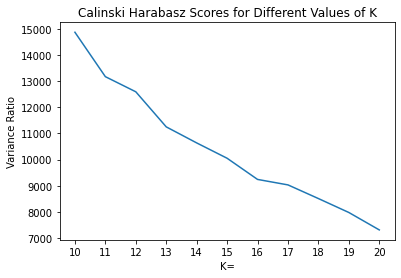

In [ ]:
# Need to decide if I keep going with more clusters
# Previous k_means_20 on unscaled data had CH around 16000, now scaled it is at 8000

plt.plot([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], CH_score)
plt.xticks([10,11,12,13,14,15,16,17,18,19,20])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')

Text(0.5, 0, 'K=')

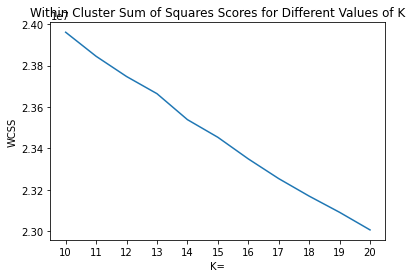

In [ ]:
# Looking at Within Cluster Sum of Squares

wcss_score = []

for model in k_list:
    labels = model.labels_
    wcss_score.append(model.inertia_)

plt.plot([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], wcss_score)
plt.xticks([10,11,12,13,14,15,16,17,18,19,20])
plt.title('Within Cluster Sum of Squares Scores for Different Values of K')
plt.ylabel('WCSS')
plt.xlabel('K=')

In [ ]:
# Silhouette score 1 is good, -1 is bad, near 0 means overlapping custers

from sklearn import metrics
metrics.silhouette_score(grouped_users, k_means_20.labels_, sample_size = 30000, random_state = random_state)

-0.04660283371870539

In [ ]:
metrics.silhouette_score(grouped_users, k_means_19.labels_, sample_size = 30000, random_state = random_state)

-0.04515098783041738

In [ ]:
# OK let's focus on k_means_20 and have a look at our clusters

k_means_20.labels_

array([ 1,  5,  7, ...,  5, 19,  5], dtype=int32)

In [ ]:
# Add cluster assignment to the grouped_users dataframe
grouped_users['cluster'] = k_means_20.labels_
grouped_users.to_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/overall_grouped_users/grouped_users_with_20clusters.pkl")

# Analyze Clusters

In [ ]:
grouped_users = pd.read_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/overall_grouped_users/grouped_users_with_20clusters.pkl")

In [ ]:
# There are top 3 big clusters and lots of smaller.  May be hard to determine what the big clusters have in common.
grouped_users.cluster.value_counts()

7     71180
1     56887
5     37100
14    11516
4      8535
6      5131
19     4809
18     1885
13     1758
16     1370
3       901
17      885
9       835
2       827
0       692
15      569
12      499
10      468
11      206
8       156
Name: cluster, dtype: int64

In [ ]:
# Now take the grouped users and group them by cluster

# For each user, I took the mode of their order_dow.  Now I am taking the median value for the cluster.
cluster_data = grouped_users.groupby('cluster').median()

In [ ]:
cluster_data

,num_orders,mode_order_dow,median_order_hour,mean_days_since,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
cluster,,,,,,,,,,,,,,,,,,,,,
0,37.0,3.0,13.0,7.833333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.5,1.0
1,7.0,5.0,14.0,17.115385,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48.0,2.0,13.0,7.408805,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,2.0,0.0,3.0,0.0,11.0,0.0,14.0
3,35.0,2.0,14.0,9.195789,0.0,2.0,0.0,0.0,0.0,0.0,...,3.0,1.0,22.0,1.0,0.0,0.0,0.0,2.0,0.0,9.0
4,17.0,3.0,14.0,13.601731,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
5,17.0,2.0,14.0,12.704594,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
6,28.0,2.0,13.5,10.401032,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,10.0
7,6.0,1.0,14.0,19.232944,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,55.0,2.0,13.0,6.266342,0.0,1.0,12.0,0.0,7.5,0.0,...,4.0,2.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,23.0


In [ ]:
# These are the users that make up cluster 8, and yes they have a lot of baby products

grouped_users[grouped_users['cluster'] == 8]

,num_orders,mode_order_dow,median_order_hour,mean_days_since,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
313,100,5,8.0,2.236200,0.0,1.0,27.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,8
652,95,4,15.0,3.734280,0.0,0.0,24.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,12.0,0.0,1.0,8
1022,79,3,15.0,4.215146,0.0,2.0,9.0,0.0,89.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,11.0,8
3639,17,2,16.0,3.702238,2.0,1.0,10.0,0.0,15.0,0.0,...,0.0,0.0,2.0,5.0,1.0,1.0,24.0,0.0,13.0,8
4425,26,1,14.0,9.049724,0.0,0.0,9.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198937,35,3,10.0,10.342640,0.0,8.0,13.0,0.0,2.0,0.0,...,0.0,0.0,9.0,0.0,4.0,0.0,0.0,0.0,14.0,8
201043,37,5,11.0,8.781250,0.0,0.0,15.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,8
201185,89,6,13.0,4.622980,0.0,3.0,15.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,2.0,0.0,31.0,0.0,1.0,8


In [ ]:
# These are all of cluster 8's values that aren't zero... still 63 of them

cluster_data.iloc[8,(cluster_data.loc[8].values > 0)]

num_orders                             55.000000
mode_order_dow                          2.000000
median_order_hour                      13.000000
mean_days_since                         6.266342
aisle_asian foods                       1.000000
                                         ...    
aisle_spreads                           4.000000
aisle_tea                               2.000000
aisle_tortillas flat bread              1.000000
aisle_water seltzer sparkling water     9.000000
aisle_yogurt                           23.000000
Name: 8, Length: 63, dtype: float64

# Use TSNE to convert cluster data to 3D

In [ ]:
# Convert to three dimensional for graphing

from sklearn.manifold import TSNE

cluster_embedded = TSNE(n_components=3).fit_transform(cluster_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
# Create dataframe to plot
cluster_embedded_df = pd.DataFrame(cluster_embedded, index = cluster_data.index, columns = ['1','2','3'])
cluster_embedded_df.reset_index(inplace=True)
cluster_embedded_df

,cluster,1,2,3
0,0,156.079300,260.144623,111.898170
1,1,-51.866093,-135.100128,-260.459747
2,2,490.429077,166.200317,0.967466
3,3,25.639940,-93.595551,350.966522
4,4,-289.097534,-326.746185,-92.371826
5,5,213.813446,-89.562904,125.038544
6,6,272.768066,89.718025,-29.685135
7,7,-140.901016,-114.542892,-54.367977
8,8,-41.943546,300.641968,-19.243572
9,9,54.387589,42.158413,-55.459152


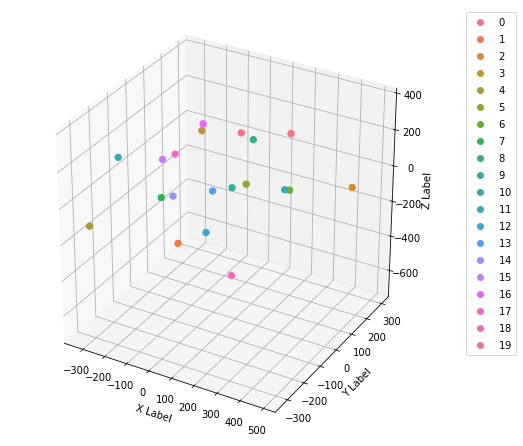

In [ ]:
import re, seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(cluster_embedded_df['1'], cluster_embedded_df['2'], cluster_embedded_df['3'], 
                s=40, c=cluster_embedded_df['cluster'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(num=20), bbox_to_anchor=(1.05, 1), loc=2)

# save
# plt.savefig("Images/scatter_hue.png", bbox_inches='tight')

In [ ]:
import plotly.express as px

fig = px.scatter_3d(cluster_embedded_df, x='1', y='2', z='3', color='cluster')
fig.show()
# This shows that clusters 2,3,4,10,18 are being very separate from the rest

In [ ]:
# cell 49 to 54 not done due to longer running time

# Cluster Breakdown by Aisle

In [ ]:
# Create a way to compare clusters.  Find if they have max or min values for any features.

cluster_metrics = {}
for cluster in cluster_data.index:
    cluster_list = [grouped_users.cluster.value_counts()[cluster]]   # get total no. of users in that cluster
    # print(cluster_list)
    for col in cluster_data.columns:
        if (cluster_data.loc[:,col].max() > 0) & (cluster_data.loc[:,col].idxmax() == cluster):
            cluster_list.append(('max ' + col, cluster_data.loc[cluster,col]))
        if (cluster_data.loc[:,col].min() > 0) & (cluster_data.loc[:,col].idxmin() == cluster):
                cluster_list.append(('min ' + col, cluster_data.loc[cluster,col]))
    cluster_metrics[cluster] = cluster_list
    # break

In [ ]:
grouped_users.cluster.value_counts()

7     71180
1     56887
5     37100
14    11516
4      8535
6      5131
19     4809
18     1885
13     1758
16     1370
3       901
17      885
9       835
2       827
0       692
15      569
12      499
10      468
11      206
8       156
Name: cluster, dtype: int64

In [ ]:
# Clusters 2,3,4,10,18 looked very separate from the rest on the graph.

print(cluster_metrics[2]) # Lots of personal care / pharmacy type products
print(cluster_metrics[3]) # max aisle_frozen vegan vegetarian, max aisle_tofu meat alternatives
print(cluster_metrics[4]) 
print(cluster_metrics[10]) # max aisle_protein meal replacements
print(cluster_metrics[18]) # max aisle_packaged produce

[827, ('max aisle_cleaning products', 11.0), ('max aisle_dish detergents', 6.0), ('max aisle_food storage', 6.0), ('max aisle_honeys syrups nectars', 1.0), ('max aisle_laundry', 8.0), ('max aisle_marinades meat preparation', 1.0), ('max aisle_more household', 1.0), ('max aisle_paper goods', 20.0), ('max aisle_plates bowls cups flatware', 1.0), ('max aisle_soft drinks', 6.0), ('max aisle_trash bags liners', 3.0)]
[901, ('max aisle_frozen vegan vegetarian', 21.0), ('max aisle_tofu meat alternatives', 22.0)]
[8535]
[468, ('max aisle_protein meal replacements', 15.0)]
[1885, ('max aisle_packaged produce', 42.0)]


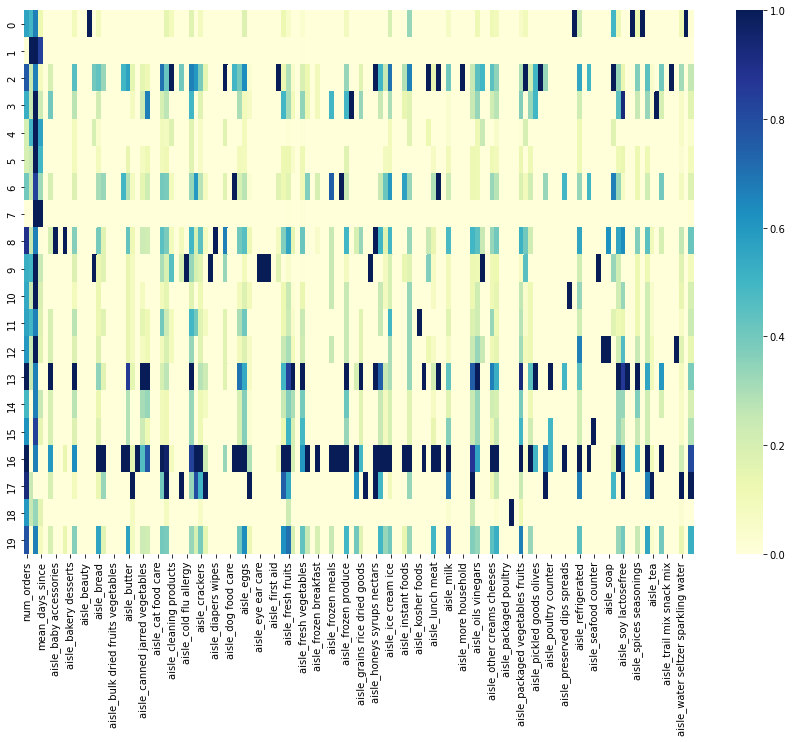

In [ ]:
# Make a heatmap of clusters and aisles
# Scale the data first to make it more meaningful
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
graph_data = scaler.fit_transform(cluster_data)
graph_df=pd.DataFrame(graph_data, columns = cluster_data.columns)
fig = plt.figure(figsize=(15,10))
heat_map = sns.heatmap(graph_df, cmap="YlGnBu")

In [ ]:
# Can I write a function to predict what cluster someone will belong in?
# They would have to give me a shopping list... no even then some clusters may be based on order frequency rather than item.
# Or rather, if they give me an item, can I ouput "Others who bought this item also bought..."
# That we will get from the recommendation system below I think

# Cluster Buying Power

In [ ]:
grouped_users

,num_orders,mode_order_dow,median_order_hour,mean_days_since,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,11,4,8.0,19.200001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
2,15,1,10.0,18.009390,0.0,3.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0,5
3,12,0,16.0,11.487180,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,7
4,5,4,13.0,15.357142,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
5,5,0,16.0,12.314285,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,4,1,16.0,14.705882,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7
206206,67,0,18.0,4.042705,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5
206207,16,1,12.0,14.879397,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,0.0,2.0,1.0,0.0,0.0,11.0,0.0,15.0,5


In [ ]:
# Add up all of the products for each person

grouped_users['num_products'] = grouped_users[grouped_users.columns[4:-1]].sum(axis=1)

In [ ]:
# This will be used to count how many users are in each cluster when I do the groupby
grouped_users['user_count'] = list(np.ones(len(grouped_users)))

In [ ]:
grouped_users = movecol(grouped_users, 
                        cols_to_move=['num_products', 'user_count', 'cluster'], 
                        ref_col='mode_order_dow', 
                        place='Before')
grouped_users

,num_orders,num_products,user_count,cluster,mode_order_dow,median_order_hour,mean_days_since,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,11,70.0,1.0,1,4,8.0,19.200001,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,15,226.0,1.0,5,1,10.0,18.009390,0.0,3.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
3,12,88.0,1.0,7,0,16.0,11.487180,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,5,18.0,1.0,1,4,13.0,15.357142,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,5,46.0,1.0,7,0,16.0,12.314285,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,4,51.0,1.0,7,1,16.0,14.705882,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
206206,67,285.0,1.0,5,0,18.0,4.042705,0.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
206207,16,223.0,1.0,5,1,12.0,14.879397,0.0,0.0,0.0,...,3.0,4.0,0.0,2.0,1.0,0.0,0.0,11.0,0.0,15.0


In [ ]:
# Group by cluster, adding up the number of products purchased
grouped_clusters = grouped_users.groupby('cluster').sum()
grouped_clusters

,num_orders,num_products,user_count,mode_order_dow,median_order_hour,mean_days_since,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
cluster,,,,,,,,,,,,,,,,,,,,,
0,29656.0,246011.0,692.0,2179,9303.0,5.822335e+03,372.0,1075.0,21.0,21.0,...,1292.0,1730.0,182.0,1511.0,161.0,423.0,181.0,7969.0,11516.0,4655.0
1,479984.0,3398666.0,56887.0,272902,773413.5,9.779409e+05,2217.0,17010.0,639.0,653.0,...,28401.0,26433.0,12160.0,17043.0,4144.0,4052.0,4527.0,108571.0,6066.0,133989.0
2,43407.0,599753.0,827.0,2120,10678.5,6.650692e+03,1084.0,2498.0,151.0,683.0,...,4998.0,4495.0,863.0,3647.0,202.0,3905.0,760.0,16898.0,659.0,19570.0
3,35028.0,498904.0,901.0,2442,12322.0,9.218682e+03,131.0,4137.0,109.0,90.0,...,4694.0,3055.0,24034.0,3544.0,236.0,254.0,695.0,8452.0,43.0,17328.0
4,166720.0,1538286.0,8535.0,23918,116001.5,1.210467e+05,6039.0,6648.0,618.0,1169.0,...,13223.0,15333.0,1912.0,8733.0,1111.0,6492.0,2615.0,57862.0,2499.0,52048.0
5,739134.0,7536181.0,37100.0,86215,500593.5,4.869803e+05,2228.0,40170.0,1347.0,1369.0,...,68848.0,59084.0,30309.0,45554.0,5403.0,3986.0,10203.0,199001.0,3558.0,368283.0
6,161710.0,2110061.0,5131.0,13260,69215.0,5.693403e+04,1660.0,9311.0,243.0,645.0,...,18406.0,13731.0,2478.0,15819.0,2078.0,2399.0,1604.0,41697.0,1624.0,80938.0
7,566386.0,4290064.0,71180.0,68961,969438.5,1.338660e+06,2191.0,21573.0,613.0,706.0,...,36892.0,30806.0,15604.0,23503.0,5483.0,4488.0,5304.0,133309.0,4192.0,180941.0
8,9135.0,126541.0,156.0,398,2068.5,1.061936e+03,84.0,667.0,2314.0,139.0,...,1196.0,1261.0,846.0,948.0,53.0,151.0,346.0,2630.0,9.0,5165.0


In [ ]:
# This doesn't take into account the relative prices of the items purchased
# But we can now see the portion of products purchased by each cluster
cluster_power = grouped_clusters.iloc[:,0:3]

In [ ]:
cluster_power

,num_orders,num_products,user_count
cluster,,,
0,29656.0,246011.0,692.0
1,479984.0,3398666.0,56887.0
2,43407.0,599753.0,827.0
3,35028.0,498904.0,901.0
4,166720.0,1538286.0,8535.0
5,739134.0,7536181.0,37100.0
6,161710.0,2110061.0,5131.0
7,566386.0,4290064.0,71180.0
8,9135.0,126541.0,156.0


In [ ]:
# Calculate ordering statistics per cluster
cluster_power['portion_of_orders'] = cluster_power['num_orders'].apply(lambda x: 
                                                                             x/(cluster_power['num_orders'].sum()))
cluster_power['portion_of_products'] = cluster_power['num_products'].apply(lambda x: 
                                                                                 x/(cluster_power['num_products'].sum()))
cluster_power['portion_of_users'] = cluster_power['user_count'].apply(lambda x: 
                                                                             x/(cluster_power['user_count'].sum()))
cluster_power['orders_per_user'] = cluster_power['num_orders']/cluster_power['user_count']
cluster_power['products_per_user'] = cluster_power['num_products']/cluster_power['user_count']

In [ ]:
cluster_power.sort_values('products_per_user', ascending=False)

,num_orders,num_products,user_count,portion_of_orders,portion_of_products,portion_of_users,orders_per_user,products_per_user
cluster,,,,,,,,
16,87797.0,1594320.0,1370.0,0.026239,0.047143,0.006644,64.085401,1163.737226
13,113787.0,1555035.0,1758.0,0.034006,0.045981,0.008525,64.725256,884.547782
17,54950.0,779876.0,885.0,0.016422,0.023060,0.004292,62.090395,881.215819
8,9135.0,126541.0,156.0,0.002730,0.003742,0.000757,58.557692,811.160256
2,43407.0,599753.0,827.0,0.012972,0.017734,0.004010,52.487304,725.215236
19,256273.0,3312984.0,4809.0,0.076589,0.097962,0.023321,53.290289,688.913288
3,35028.0,498904.0,901.0,0.010468,0.014752,0.004369,38.876804,553.722531
15,25205.0,302895.0,569.0,0.007533,0.008956,0.002759,44.297012,532.328647
11,8786.0,103641.0,206.0,0.002626,0.003065,0.000999,42.650485,503.111650


# Clustering Conclusions

Sorting these statistics different ways shows interesting results depending on what we are looking for. 

- We can see that cluster 16 orders a very large number of products per user, but overall cluster 16 represents a small portion of all of the users. 

- simlarly ------> Cluster 12 represents over 50% of all of the users, but only 25% of the orders and only 17% of the products. Cluster 1 is very proportional with about 23% of the users, orders, and products. Cluster 4 is the third largest cluster with 7% of the users, but they make up about 17% of the orders and products.

Overall, the clustering did a good job of categorizing our users based on their purchases. I think this information could be very useful to a business looking to personalize marketing efforts to their users.

# NLP Metadata Search Engine

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
products_desc = pd.read_csv('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/df_products_description.csv', index_col=0)
products_desc

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


Create a metadta and fit to a vectorizer

In [ ]:
products_desc['metadata'] = products_desc.apply(lambda x : x['aisle']+' '+x['department']+' '+x['product_name'], axis = 1)

In [ ]:
products_desc.head()

,product_id,product_name,aisle_id,department_id,aisle,department,metadata
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,cookies cakes snacks Chocolate Sandwich Cookies
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,spices seasonings pantry All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,tea beverages Robust Golden Unsweetened Oolong...
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,frozen meals frozen Smart Ones Classic Favorit...
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,marinades meat preparation pantry Green Chile ...


In [ ]:
count_vec = CountVectorizer(stop_words='english')
count_vec_matrix = count_vec.fit_transform(products_desc['metadata'])

In [ ]:
print(count_vec_matrix.shape)
count_vec_matrix

(49688, 10624)


<49688x10624 sparse matrix of type '<class 'numpy.int64'>'
	with 357715 stored elements in Compressed Sparse Row format>

In [ ]:
# This function takes in any words and vectorizes them, then finds similar vector in the count_vec_matrix
# see kaise kaam krta h ye cosine similarity
def vectorize_products_based_on_metadata(product_input):

    vec = count_vec.transform(pd.Series(product_input))
    
    simil = cosine_similarity(vec, count_vec_matrix)
    
    simil_scores = pd.DataFrame(simil.reshape(49688,), index = products_desc.index, columns=['score'])
    
    # Don't return scores of zero, only as many positive scores as exist
    non_zero_scores = simil_scores[simil_scores['score'] > 0]
    
    if len(non_zero_scores) == 0:
        print('No similar products found.  Please refine your search terms and try again')
        return
    
    if len(non_zero_scores) < 10:
        item_count = len(non_zero_scores)
    else:
        item_count = 10
    
    similarity_scores = simil_scores.sort_values(['score'], ascending=False)[:item_count]
    
    return (products_desc['product_name'].iloc[similarity_scores.index])

In [ ]:
vectorize_products_based_on_metadata('Oreo')

10811                     Peppermint Oreo
33185                         Spring Oreo
29266                    Mini Oreo Go Pak
44594                   Golden Oreo Thins
16342                 Chocolate Chip Oreo
31535           Mini Oreo Golden Snak Sak
34935                 Oreo Filled Cupcake
13998      Oreo Cookie Sticks & Creme Dip
23551            Oreo Chocolate Candy Bar
14800    Coconut Delight Creme Fudge Oreo
Name: product_name, dtype: object

In [ ]:
vectorize_products_based_on_metadata('Oreos')

# Interesting that only results with "oreos" show up and not 'oreo'

22014               Thin Mint Crisp Oreos
23995    Halloween Oreos Sandwich Cookies
Name: product_name, dtype: object

In [ ]:
vectorize_products_based_on_metadata('Oreos Cookies')

# Even adding 'cookies' doesn't get me oreo

23995    Halloween Oreos Sandwich Cookies
22014               Thin Mint Crisp Oreos
21335                   Almonette Cookies
1623                    Chocolate Cookies
44472                     Vanilla Cookies
22343                  Animalitos Cookies
16549                     Variety Cookies
28317                      Geneva Cookies
23563                  Gingersnap Cookies
33063                       Lemon Cookies
Name: product_name, dtype: object

In [ ]:
vectorize_products_based_on_metadata('Premium Almonds')

49178                                      Premium Almonds
24511    Condoms, Premium Latex, Ultra Thin, Premium Lu...
44962                               Roasted Tamari Almonds
7272                                Yogurt Covered Almonds
5597                                Organic Tamari Almonds
23466                           Platinum Premium Lubricant
20405                             Roasted Unsalted Almonds
21698    Pistachios, Premium Blend, Pomegranate, with A...
18035                                  Premium Horseradish
25923                        Premium Lubricant Condoms Enz
Name: product_name, dtype: object

In [ ]:
# I'd rather put more weight on the noun and less on the adjective
# Can look into word embeddings for this

vectorize_products_based_on_metadata('Red Potatoes')

13732                 Red Potatoes
5651          Organic Red Potatoes
3492             Baby Red Potatoes
44892                          Red
10469                   B Side Red
47794                     Red Wine
13706                Essential Red
6877                     Red Blend
14259    Organic Red Potatoes, Bag
4739                     Decoy Red
Name: product_name, dtype: object

In [ ]:
vectorize_products_based_on_metadata('randomword') # Showing edge case of no matches

No similar products found.  Please refine your search terms and try again


# Stem the product metadata and refit
These are mostly proper names of products so I don't think I want to lemmatize as that may change the product name too much.

In [ ]:
# stemming and lemmatization difference samjho

In [ ]:
import nltk
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
stem_list=[]
for i in range(len(products_desc['metadata'])):
    word_list = nltk.word_tokenize(products_desc['metadata'][i])
    stem_set = list(set([stemmer.stem(word) for word in word_list]))
    stem_list.append(' '.join(stem_set))

In [ ]:
from collections import defaultdict
word_count=defaultdict(int)
for idx, product in enumerate(stem_list):
    for word in product.split():
        word_count[word] +=1

In [ ]:
len(word_count)

10357

In [ ]:
# trying to figure out how to make this smaller for FLASK
# Can I remove words only used once?

word_ones=[]
for word, count in word_count.items():
    if count == 1:
        word_ones.append(word)

In [ ]:
len(word_ones)

4503

In [ ]:
new_stem_list=[]
for i in range(len(products_desc['metadata'])):
    word_list = nltk.word_tokenize(products_desc['metadata'][i])
    stem_set = list(set([stemmer.stem(word) for word in word_list if stemmer.stem(word) not in word_ones]))
    new_stem_list.append(' '.join(stem_set))

In [ ]:
new_stem_list

In [ ]:
products_desc['stemmed'] = stem_list
products_desc['new_stemmed'] = new_stem_list

In [ ]:
products_desc.head()

,product_id,product_name,aisle_id,department_id,aisle,department,metadata,stemmed,new_stemmed
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,cookies cakes snacks Chocolate Sandwich Cookies,chocol sandwich cooki snack cake,chocol sandwich cooki snack cake
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,spices seasonings pantry All-Seasons Salt,season spice salt all-season pantri,season spice pantri salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,tea beverages Robust Golden Unsweetened Oolong...,oolong golden tea robust unsweeten beverag,oolong golden tea robust unsweeten beverag
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,frozen meals frozen Smart Ones Classic Favorit...,favorit one rigatoni vodka frozen cream smart ...,favorit one rigatoni vodka frozen cream smart ...
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,marinades meat preparation pantry Green Chile ...,marinad chile sauc green prepar meat pantri an...,marinad chile sauc green prepar meat pantri an...


In [ ]:
products_desc.to_csv('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/product_desc_with_stemming/products_desc_with_stem.csv')

In [ ]:
products_desc_stemmed = pd.read_csv('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/product_desc_with_stemming/products_desc_with_stem.csv', index_col =0)

In [ ]:
products_desc_stemmed.to_pickle("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/product_desc_with_stemming/products_desc_stemmed.p")

In [ ]:
products_desc_stemmed.head()

,product_id,product_name,aisle_id,department_id,aisle,department,metadata,stemmed,new_stemmed
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,cookies cakes snacks Chocolate Sandwich Cookies,chocol sandwich cooki snack cake,chocol sandwich cooki snack cake
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,spices seasonings pantry All-Seasons Salt,season spice salt all-season pantri,season spice pantri salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,tea beverages Robust Golden Unsweetened Oolong...,oolong golden tea robust unsweeten beverag,oolong golden tea robust unsweeten beverag
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,frozen meals frozen Smart Ones Classic Favorit...,favorit one rigatoni vodka frozen cream smart ...,favorit one rigatoni vodka frozen cream smart ...
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,marinades meat preparation pantry Green Chile ...,marinad chile sauc green prepar meat pantri an...,marinad chile sauc green prepar meat pantri an...


In [ ]:
# Passing pieces of dataframe in FLASK to be put back together there
pickle.dump(products_desc_stemmed.columns.values,open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/flask_nlp_df_pieces/columns.p','wb'))
pickle.dump(products_desc_stemmed.index.values, open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/flask_nlp_df_pieces/prod_index.p', 'wb'))
pickle.dump(products_desc_stemmed.product_name.values, open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/flask_nlp_df_pieces/prod_name.p', 'wb'))
pickle.dump(products_desc_stemmed.aisle.values, open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/flask_nlp_df_pieces/prod_aisle.p', 'wb'))
pickle.dump(products_desc_stemmed.product_id.values, open('/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/flask_nlp_df_pieces/prod_id.p', 'wb'))

In [ ]:
products_desc_stemmed.product_name.values

array(['Chocolate Sandwich Cookies', 'All-Seasons Salt',
       'Robust Golden Unsweetened Oolong Tea', ..., 'Artisan Baguette',
       'Smartblend Healthy Metabolism Dry Cat Food',
       'Fresh Foaming Cleanser'], dtype=object)

In [ ]:
products_desc['stemmed'].values[0]

'chocol sandwich cooki snack cake'

In [ ]:
import numpy as np

In [ ]:
np.array(products_desc['stemmed'])[0]

'chocol sandwich cooki snack cake'

In [ ]:
# Fitting the vectorizer
stem_count_vec = CountVectorizer(stop_words='english')
stem_count_vec_matrix = stem_count_vec.fit_transform(products_desc['stemmed'])

In [ ]:
stem_count_vec_matrix.shape # reduced the size from 10624 to 9086 words

(49688, 9086)

In [ ]:
# Fitting the vectorizer with one time words removed
new_stem_count_vec = CountVectorizer(stop_words='english')
new_stem_count_vec_matrix = new_stem_count_vec.fit_transform(products_desc['new_stemmed'])

In [ ]:
new_stem_count_vec_matrix.shape

(49688, 5310)

In [ ]:
pickle.dump(stem_count_vec, open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/flask_nlp_df_pieces/stem_count_vec.p", "wb"))
pickle.dump(stem_count_vec_matrix, open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/flask_nlp_df_pieces/stem_count_vec_matrix.p", "wb"))
pickle.dump(new_stem_count_vec, open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/flask_nlp_df_pieces/new_stem_count_vec.p", "wb"))
pickle.dump(new_stem_count_vec_matrix, open("/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data/flask_nlp_df_pieces/new_stem_count_vec_matrix.p", "wb"))

In [ ]:
# This improved function takes in any words and stems and vectorizes them

def stem_and_vectorize_products_based_on_metadata(product_input):

    word_list = nltk.word_tokenize(product_input)

    input_stemmed = ' '.join([stemmer.stem(word) for word in word_list])

    vec = stem_count_vec.transform(np.array(input_stemmed).reshape(1,)) # changed to array instead of Series for time
    
    simil = cosine_similarity(vec, stem_count_vec_matrix)
    
    simil_scores = pd.DataFrame(simil.reshape(stem_count_vec_matrix.shape[0],), 
                                index = products_desc.index, columns=['score'])
    
    # Don't return scores of zero, only as many positive scores as exist
    non_zero_scores = simil_scores[simil_scores['score'] > 0]
    
    if len(non_zero_scores) == 0:
        print('No similar products found.  Please refine your search terms and try again')
        return
    
    if len(non_zero_scores) < 10:
        item_count = len(non_zero_scores)
    else:
        item_count = 10
    
    similarity_scores = simil_scores.sort_values(['score'], ascending=False)[:item_count]
    
    return (products_desc['product_name'].iloc[similarity_scores.index])

In [ ]:
# rather than just printing out I want to store the recs to use in FLASK
recs = stem_and_vectorize_products_based_on_metadata('Oreos') 

In [ ]:
recs

16342                Chocolate Chip Oreo
34935                Oreo Filled Cupcake
10811                    Peppermint Oreo
44594                  Golden Oreo Thins
47757                Oreo Ice Cream Bars
25744         Oreo  Ice Cream Sandwiches
33185                        Spring Oreo
23551           Oreo Chocolate Candy Bar
12480    Oreo Chocolate Sandwich Cookies
22014              Thin Mint Crisp Oreos
Name: product_name, dtype: object

In [ ]:
# Much happier with this output now that we have tokenized, stemmed, and joined the words

In [ ]:
'''The NLP search engine would be a useful tool for online shopping recommendations.  Perhaps generating word embeddings
could even improve the results.'''

'The NLP search engine would be a useful tool for online shopping recommendations.  Perhaps generating word embeddings\ncould even improve the results.'